# Compare Monte Carlo and simple Riemann integral
by calculating the volume of N-dimensional sphere with same number of function evaluations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simple Linear Congruent Generators

In [2]:
def seedLCG(initVal):
    global randLCG
    randLCG = initVal
    
def lcg():
    a = 1140671485 #4
    c = 128201163 # 1
    m =  2**24 # 9
    global randLCG
    randLCG = (a*randLCG + c) % m
    return randLCG / m

def lcgN(n):
    return np.array([lcg() for i in range(n)])

#### A very weak one

In [3]:
def seedLCG_w(initVal):
    global randLCG_w
    randLCG_w = initVal
    
def lcg_w():
    a = 4
    c = 1
    m =  9
    global randLCG_w
    randLCG_w = (a*randLCG_w + c) % m
    return randLCG_w / m

def lcgN_weak(n):
    return np.array([lcg_w() for i in range(n)])

In [4]:
seedLCG(3)
seedLCG_w(3)

print(lcgN(20))
print(lcgN_weak(20))

[0.60934079 0.94434386 0.38775992 0.89973587 0.27463567 0.10495335
 0.68644905 0.91211575 0.76215422 0.31842309 0.26796365 0.75180048
 0.7404145  0.1416989  0.77396631 0.55630225 0.60937989 0.93739063
 0.42912745 0.71410984]
[0.44444444 0.88888889 0.66666667 0.77777778 0.22222222 0.
 0.11111111 0.55555556 0.33333333 0.44444444 0.88888889 0.66666667
 0.77777778 0.22222222 0.         0.11111111 0.55555556 0.33333333
 0.44444444 0.88888889]


### Demonstration in 2 dimensions

Relative errors:
Riemann: 0.00021083321836568025
MC: 0.023849682369708525
MC with LCG: 0.15966190047479256


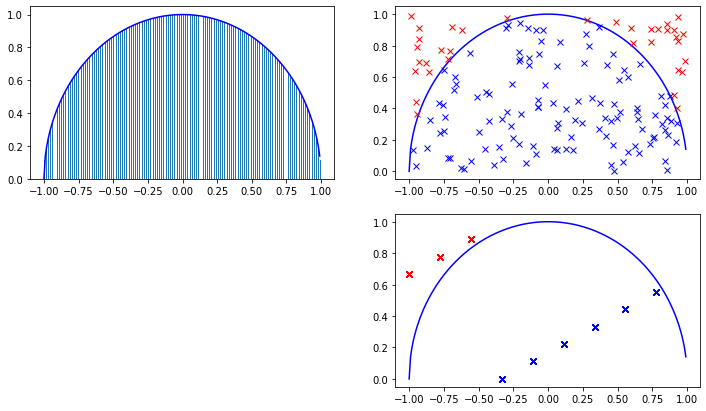

In [5]:
# 2D: Half circle

def half_circle(x,r):
    return np.sqrt(r*r-x*x)

# number of divisions
n = 150

# Riemann integral
x100 = np.arange(-1.0,1.0,0.01)
#xN = np.linspace(-1,1,n)
halfBin = 2.0/(n-1) / 2
xN = np.linspace(-(1-halfBin),1-halfBin,n) # shift with half bin

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(221)
ax1.plot(x100,half_circle(x100,1.0),'b')
ax1.bar(xN,half_circle(xN,1.0), width=0.9/n)


# MC integral
xMC = 2*np.random.rand(n)-1.0
yMC = np.random.rand(n)
aboveIdx = (yMC >= half_circle(xMC,1.0))
belowIdx = (yMC < half_circle(xMC,1.0))

#USE LCG instead
xMC2 = 2*lcgN_weak(n)-1.0
yMC2 = lcgN_weak(n)
aboveIdx2 = (yMC2 >= half_circle(xMC2,1.0))
belowIdx2 = (yMC2 < half_circle(xMC2,1.0))
            
ax2 = fig.add_subplot(222)
ax2.plot(x100,half_circle(x100,1.0),'b')
ax2.plot(xMC[belowIdx],yMC[belowIdx],'bx')
ax2.plot(xMC[aboveIdx],yMC[aboveIdx],'rx')   

ax3 = fig.add_subplot(224)
ax3.plot(x100,half_circle(x100,1.0),'b')
ax3.plot(xMC2[belowIdx2],yMC2[belowIdx2],'bx')
ax3.plot(xMC2[aboveIdx2],yMC2[aboveIdx2],'rx')    

dx = 2.0/len(xN)
areaCirc = np.pi

print('Relative errors:')
print('Riemann:',np.abs(1-2*np.nan_to_num(half_circle(xN,1.0)).sum() * dx / areaCirc)) 
print('MC:',np.abs(1-2*belowIdx.sum()/n/(np.pi/2.0)))
print('MC with LCG:',np.abs(1-2*belowIdx2.sum()/n/(np.pi/2.0)))


In [6]:
lst = []
for i in range(300):
    n = i+10
    
    dx = 2.0/len(xN)
    areaCirc = np.pi
    
    # Riemann integral
    x100 = np.arange(-1.0,1.0,0.01)
    #xN = np.linspace(-1,1,n)
    halfBin = 2.0/(n-1) / 2
    xN = np.linspace(-(1-halfBin),1-halfBin,n) # shift with half bin

    # MC integral
    xMC = 2*np.random.rand(n)-1.0
    yMC = np.random.rand(n)
    aboveIdx = (yMC >= half_circle(xMC,1.0))
    belowIdx = (yMC < half_circle(xMC,1.0))

    #USE LCG instead
    xMC2 = 2*lcgN_weak(n)-1.0
    yMC2 = lcgN_weak(n)
    aboveIdx2 = (yMC2 >= half_circle(xMC2,1.0))
    belowIdx2 = (yMC2 < half_circle(xMC2,1.0))
    
    rel1 = np.abs(1-2*np.nan_to_num(half_circle(xN,1.0)).sum() * dx / areaCirc) 
    rel2 = np.abs(1-2*belowIdx.sum()/n/(np.pi/2.0))
    rel3 = np.abs(1-2*belowIdx2.sum()/n/(np.pi/2.0))
    lst.append([n,rel1,rel2,rel3])
    
lst = np.array(lst)


Text(0, 0.5, 'Relative error')

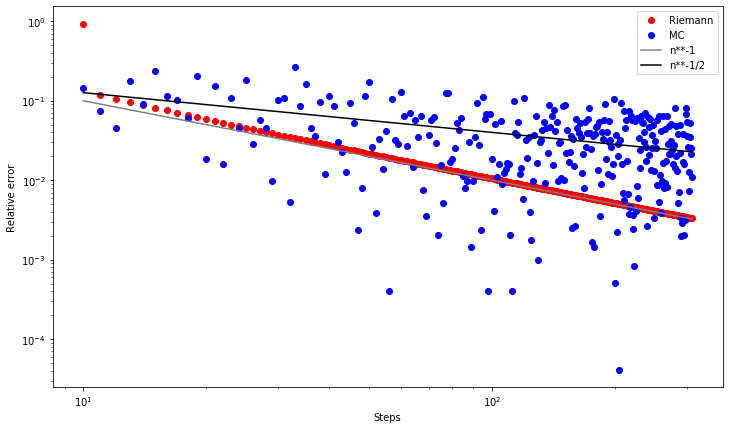

In [42]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.loglog(lst[:,0],lst[:,1],'o',label='Riemann',color='red')
ax1.loglog(lst[:,0],lst[:,2],'o',label='MC',color='blue')
ax1.loglog(lst[:,0],lst[:,0]**-1,label='n**-1',color='gray')
ax1.loglog(lst[:,0],0.4*lst[:,0]**-0.5,label='n**-1/2',color='black')
ax1.legend()
plt.xlabel('Steps')
plt.ylabel('Relative error')
#ax1.semilogy(lst[:,0],lst[:,3],'.-',label='MC LCG')

### Higher dimensions

$$ {\displaystyle V_{n}(R)={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}R^{n},} $$

In [43]:
# d dim, half hypersphere above a d-1 dimensional hypersphere

import math



def nSphereVolume(dd):
    '''The exact volume of a dd dimensional sphere'''
    return math.pi**(dd/2)/math.gamma(dd/2 + 1)

def half_hyperSphere(x,r):
    '''Returns the height of a radius r half-hypersphere above x'''
    return np.sqrt(r*r - (x*x).sum(axis=0))

# Riemann

DIM = 10

d = DIM-1 # this is(DIM-1), the hyperplane's dimension
n1 = int(100000**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
#x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d),np.ones(d))]) )
halfBin = 2.0/(n1-1) / 2
x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d)+halfBin,np.ones(d)-halfBin)]) )
dV = 2.0**d/n1**d

# evaluate the hypersphere function and calculate the integral
funcValues = np.nan_to_num(half_hyperSphere(x1,1.0))
vol1 = funcValues.sum() * dV / (nSphereVolume(d+1) / 2)
print('Riemann:', vol1 )

# MC

# MC integral
nTry = 100 # several trials
idx = np.arange(nTry)
mcVec = [] # this will collect the estimates
for i in idx:  
    xMC = 2*np.random.rand(d,n1**d)-1
    yMC = np.random.rand(n1**d)
    ### USE LCG
    #xMC = 2 * np.array([lcgN(n1**d) for k in range(d)])-1 
    #yMC = lcgN(n1**d)
    aboveIdx = (yMC >= np.nan_to_num(half_hyperSphere(xMC,1.0)))
    belowIdx = (yMC < np.nan_to_num(half_hyperSphere(xMC,1.0)))
    mcVol = belowIdx.sum() /(belowIdx.sum()+aboveIdx.sum()) * 2**(d+1) / (nSphereVolume(d+1))
    mcVec.append(mcVol)
    print('MC:',mcVol,end=" ")



<ipython-input-43-9e6c8f1489bb>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r - (x*x).sum(axis=0))


Riemann: 9.270222957444064
MC: 0.8568204771250725 MC: 0.9384224273274605 MC: 1.0404248650804453 MC: 0.8160195020238786 MC: 0.9588229148780574 MC: 0.8976214522262664 MC: 1.2240292530358179 MC: 1.2444297405864149 MC: 0.7140170642708937 MC: 1.101626327732236 MC: 1.1220268152828332 MC: 0.7752185269226847 MC: 1.0404248650804453 MC: 0.8568204771250725 MC: 1.3056312032382056 MC: 1.183228277934624 MC: 0.7752185269226847 MC: 1.203628765485221 MC: 1.0404248650804453 MC: 0.7548180393720877 MC: 0.8568204771250725 MC: 1.060825352631042 MC: 0.8976214522262664 MC: 1.081225840181639 MC: 0.9180219397768635 MC: 0.8568204771250725 MC: 0.8364199895744755 MC: 0.8976214522262664 MC: 1.081225840181639 MC: 1.060825352631042 MC: 1.2852307156876088 MC: 1.060825352631042 MC: 0.9792234024286544 MC: 1.1424273028334302 MC: 1.2444297405864149 MC: 0.8160195020238786 MC: 0.9996238899792513 MC: 0.8160195020238786 MC: 1.060825352631042 MC: 1.101626327732236 MC: 1.1424273028334302 MC: 0.8160195020238786 MC: 1.26483022813

In [44]:
print('Riemann difference from true ratio:', 1-vol1)
print('MC standard deviation around true ratio:', np.std(mcVec))

Riemann difference from true ratio: -8.270222957444064
MC standard deviation around true ratio: 0.14194561896729657


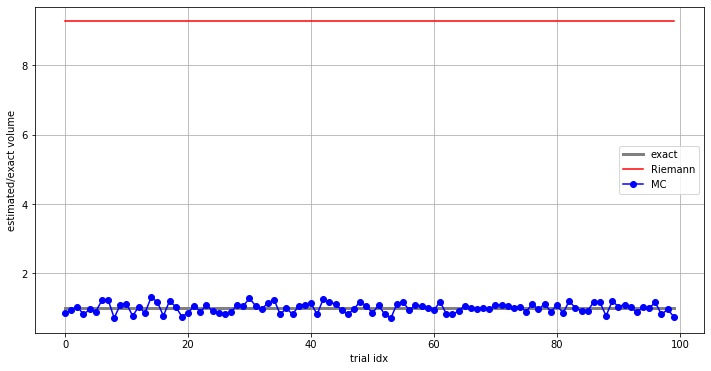

In [45]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.plot(idx,np.ones(nTry),linewidth=3,label='exact',color='gray')
ax1.plot(idx,vol1*np.ones(nTry),label='Riemann',color='red')
ax1.plot(idx,mcVec,'-o',label='MC',color='blue')
ax1.set_xlabel('trial idx')
ax1.set_ylabel('estimated/exact volume')
ax1.grid()
ax1.legend()

### Accuracy vs dimensions
#### Observations:
- MC error seems to be independent of number of dimensions: $O(1/{N^{1/2}})$
- Riemann error increase faster than the theoretical $O(1/{N^{1/d}})$ more like $O(1/{N^{4/d}})$

In [179]:
%%time
# Riemann
nPoints = 1000000
riemann = []
for DIM in range(2,15): 
    #print(DIM)
    d = DIM-1 # this is(DIM-1), the hyperplane's dimension
    n1 = int(nPoints**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
    #x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d),np.ones(d))]) )
    halfBin = 2.0/(n1-1) / 2
    x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d)+halfBin,np.ones(d)-halfBin)]) )
    dV = 2.0**d/n1**d

    # evaluate the hypersphere function and calculate the integral
    funcValues = np.nan_to_num(half_hyperSphere(x1,1.0))
    vol1 = funcValues.sum() * dV / (nSphereVolume(d+1) / 2)
    #print('Riemann:', vol1 )
    riemann.append([DIM,vol1])

riemann = np.array(riemann)

<ipython-input-43-9e6c8f1489bb>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r - (x*x).sum(axis=0))


CPU times: user 230 ms, sys: 148 ms, total: 377 ms
Wall time: 374 ms


In [180]:
%%time
# MC
nTry = 10 # several trials
print("Run time for ",nTry," runs.")

mcIntegral = []
for DIM in range(2,15): 
    d = DIM-1 # this is(DIM-1), the hyperplane's dimension
    n1 = int(nPoints**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
    # MC integral
    idx = np.arange(nTry)
    mcVec = [] # this will collect the estimates
    for i in idx:  
        xMC = 2*np.random.rand(d,n1**d)-1
        yMC = np.random.rand(n1**d)
        ### USE LCG
        #xMC = 2 * np.array([lcgN(n1**d) for k in range(d)])-1 
        #yMC = lcgN(n1**d)
        aboveIdx = (yMC >= np.nan_to_num(half_hyperSphere(xMC,1.0)))
        belowIdx = (yMC < np.nan_to_num(half_hyperSphere(xMC,1.0)))
        mcVol = belowIdx.sum() /(belowIdx.sum()+aboveIdx.sum()) * 2**(d+1) / (nSphereVolume(d+1))
        mcVec.append(mcVol)
        #print('MC:',mcVol,end=" ")
    mcIntegral.append([DIM, np.mean(mcVec),np.std(mcVec)])    
mcIntegral = np.array(mcIntegral)    

Run time for  10  runs.


<ipython-input-43-9e6c8f1489bb>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r - (x*x).sum(axis=0))


CPU times: user 7.05 s, sys: 589 ms, total: 7.64 s
Wall time: 7.64 s


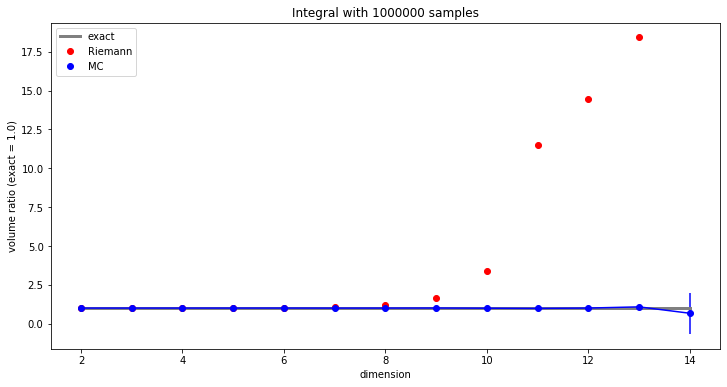

In [181]:
fig = plt.figure(figsize=(12,6))
idx=range(2,15)
plt.plot(idx,np.ones(len(idx)),linewidth=3,label='exact',color='gray')
plt.plot(riemann[:-1,0],riemann[:-1,1],'o',label="Riemann",color='red')
plt.plot(mcIntegral[:,0],mcIntegral[:,1],'o',label="MC",color='blue')
plt.errorbar(mcIntegral[:,0],mcIntegral[:,1],  yerr=mcIntegral[:,2],color='blue')
plt.title("Integral with "+str(nPoints)+" samples")
plt.xlabel("dimension")
plt.ylabel("volume ratio (exact = 1.0)")
plt.legend()


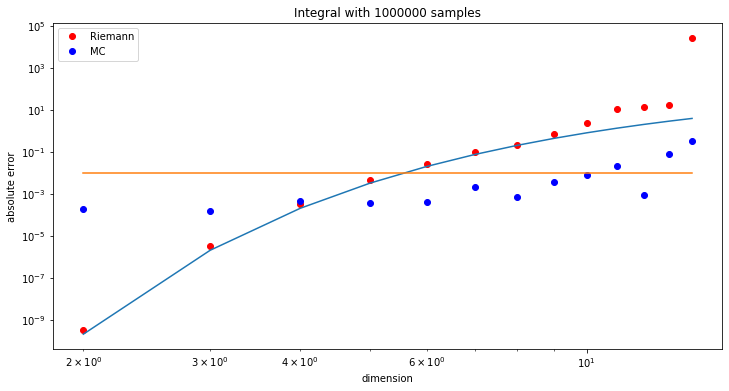

In [185]:
riemannErrDim = np.abs(riemann[:,1]-1)
mcErrDim = np.abs(mcIntegral[:,1]-1)

fig = plt.figure(figsize=(12,6))
idx=np.arange(2,15)
#plt.plot(idx,np.ones(len(idx)),linewidth=3,label='exact',color='gray')
plt.loglog(idx,riemannErrDim,'o',label="Riemann",color='red')
plt.loglog(idx,mcErrDim,'o',label="MC",color='blue')
#plt.loglog(idx,1/(nPoints**(1/idx)))
plt.loglog(idx,200/(nPoints**(4.0/idx)))
plt.loglog(idx,10/np.sqrt(np.ones(len(idx))*nPoints))
#plt.errorbar(mcIntegral[:,0],mcIntegral[:,1],  yerr=mcIntegral[:,2],color='blue')
plt.title("Integral with "+str(nPoints)+" samples")
plt.xlabel("dimension")
plt.ylabel("absolute error")
plt.legend()




### Accuracy vs number of samples

In [186]:
%%time
DIM = 10
riemannPt = []
sampling = [10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,20000000,50000000,100000000]
for nPoints in sampling:
    d = DIM-1 # this is(DIM-1), the hyperplane's dimension
    n1 = int(nPoints**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
    #x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d),np.ones(d))]) )
    halfBin = 2.0/(n1-1) / 2
    x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d)+halfBin,np.ones(d)-halfBin)]) )
    dV = 2.0**d/n1**d

    # evaluate the hypersphere function and calculate the integral
    funcValues = np.nan_to_num(half_hyperSphere(x1,1.0))
    vol1 = funcValues.sum() * dV / (nSphereVolume(d+1) / 2)
    #print('Riemann:', vol1 )
    riemannPt.append([nPoints,vol1])
riemannPt = np.array(riemannPt)    

<ipython-input-43-9e6c8f1489bb>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r - (x*x).sum(axis=0))


CPU times: user 4.93 s, sys: 6.02 s, total: 11 s
Wall time: 11 s


In [187]:
%%time
mcIntegralPt = []
# MC
nTry = 1 # several trials
print("Run time for ",nTry," runs.")
for nPoints in sampling:
    d = DIM-1 # this is(DIM-1), the hyperplane's dimension
    n1 = int(nPoints**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
    # MC integral
    idx = np.arange(nTry)
    mcVec = [] # this will collect the estimates
    for i in idx:  
        xMC = 2*np.random.rand(d,n1**d)-1
        yMC = np.random.rand(n1**d)
        ### USE LCG
        #xMC = 2 * np.array([lcgN(n1**d) for k in range(d)])-1 
        #yMC = lcgN(n1**d)
        aboveIdx = (yMC >= np.nan_to_num(half_hyperSphere(xMC,1.0)))
        belowIdx = (yMC < np.nan_to_num(half_hyperSphere(xMC,1.0)))
        mcVol = belowIdx.sum() /(belowIdx.sum()+aboveIdx.sum()) * 2**(d+1) / (nSphereVolume(d+1))
        mcVec.append(mcVol)
        #print('MC:',mcVol,end=" ")    
    mcIntegralPt.append([nPoints, np.mean(mcVec),np.std(mcVec)])
mcIntegralPt = np.array(mcIntegralPt)    

Run time for  1  runs.


<ipython-input-43-9e6c8f1489bb>:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r - (x*x).sum(axis=0))


CPU times: user 15.4 s, sys: 7.29 s, total: 22.7 s
Wall time: 22.7 s


Text(0, 0.5, 'Relative error')

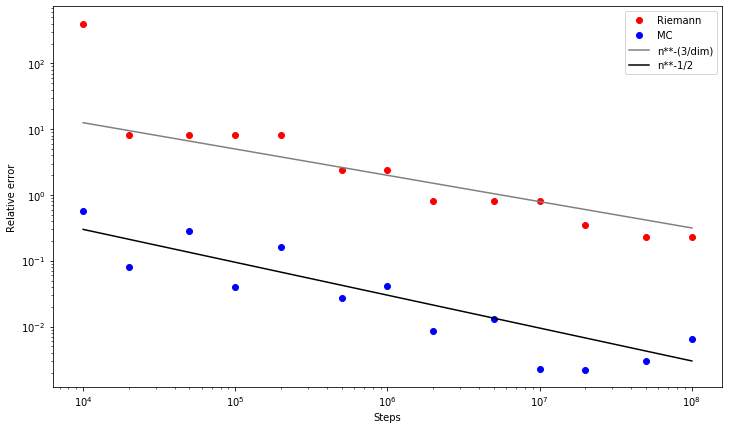

In [194]:
riemannErr = np.abs(riemannPt[:,1]-1)
mcErr = np.abs(mcIntegralPt[:,1]-1)

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.loglog(riemannPt[:,0],riemannErr,'o',label='Riemann',color='red')
ax1.loglog(mcIntegralPt[:,0],mcErr,'o',label='MC',color='blue')
ax1.loglog(mcIntegralPt[:,0],5e2*mcIntegralPt[:,0]**-(4/DIM),label='n**-(3/dim)',color='gray')
ax1.loglog(mcIntegralPt[:,0],30*mcIntegralPt[:,0]**-0.5,label='n**-1/2',color='black')
ax1.legend()
plt.xlabel('Steps')
plt.ylabel('Relative error')
#ax1.semilogy(lst[:,0],lst[:,3],'.-',label='MC LCG')